In [ ]:
import seaborn as sns
from keras.datasets import reuters
from keras.datasets import imdb
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import layers
import numpy as np
from numpy import linalg as LA
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

<효민>
3.5장 다중분류문제에서 활성화 함수, 최적화 알고리즘, 손실 함수를 자유롭게 바꾼 모델을 하나 만들어 훈련하고 정확도 곡선을 그려보세요.
https://keras.io/ko/optimizers/

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 3.2401 - accuracy: 0.3900 - val_loss: 2.0341 - val_accuracy: 0.6010
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.7902 - accuracy: 0.6399 - val_loss: 1.5185 - val_accuracy: 0.6530
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3035 - accuracy: 0.7074 - val_loss: 1.2590 - val_accuracy: 0.7050
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0398 - accuracy: 0.7727 - val_loss: 1.1069 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8632 - accuracy: 0.8211 - val_loss: 1.0127 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6967 - accuracy: 0.8649 - val_loss: 0.9406 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5667 - accuracy: 0.8975 - val_loss: 0.8911 - val_accuracy: 0.8180
Epoch 8/20
16

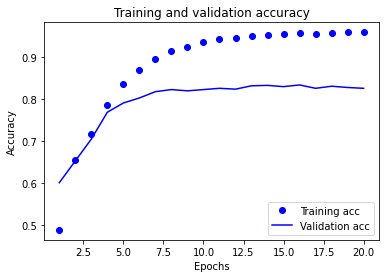

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 3.5627 - accuracy: 0.1036 - val_loss: 2.7629 - val_accuracy: 0.5580
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 2.5616 - accuracy: 0.5627 - val_loss: 2.1929 - val_accuracy: 0.5450
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 2.0700 - accuracy: 0.5639 - val_loss: 1.9085 - val_accuracy: 0.5830
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 1.8182 - accuracy: 0.6168 - val_loss: 1.7325 - val_accuracy: 0.6170
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 1.6205 - accuracy: 0.6503 - val_loss: 1.6016 - val_accuracy: 0.6390
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4965 - accuracy: 0.6668 - val_loss: 1.4948 - val_accuracy: 0.6570
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 1.3571 - accuracy: 0.7000 - val_loss: 1.4070 - val_accuracy: 0.6780
Epoch 8/20
16

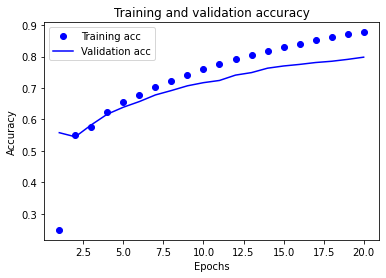

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='sigmoid', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<<지은>>
우리 모두가 많이 본 붓꽃 데이터셋을 로딩하여 신경망 모델을 만들고 정확도나 손실 관련한 수치를 시각화로 표현해주세요

데이터 로딩은 다음과 같습니다
import seaborn as sns

붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
iris = sns.load_dataset("iris")

iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
data = iris.iloc[:, :4].values
target = iris.iloc[:, -1].values

encoder = LabelEncoder()
label = encoder.fit_transform(target)
labels = pd.get_dummies(label).values

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, stratify=iris.species, test_size=0.2, random_state = 42)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu', input_shape=(4,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

hist = model.fit(data_train, labels_train,
                    epochs=50,
                    validation_data=(data_test, labels_test))

Epoch 1/50
4/4 [==============================] - 1s 69ms/step - loss: 2.6412 - accuracy: 0.3458 - val_loss: 1.7315 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 1.7972 - accuracy: 0.3352 - val_loss: 1.2109 - val_accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 1.1320 - accuracy: 0.6821 - val_loss: 0.9732 - val_accuracy: 0.6333
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.9708 - accuracy: 0.5058 - val_loss: 0.9031 - val_accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.9156 - accuracy: 0.3531 - val_loss: 0.8797 - val_accuracy: 0.4667
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.8537 - accuracy: 0.5771 - val_loss: 0.8110 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.7729 - accuracy: 0.7094 - val_loss: 0.7428 - val_accuracy: 0.6667
Epoch 8/50
4/4 [===========

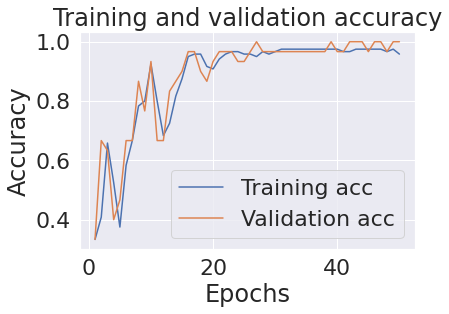

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<<지우>>
IMDB데이터 가지고 모델 만들어 learning rate를 줄여보기도 하고, 키워보기도 하면서(p111) 훈련과 검증의 손실 그래프(p113), 정확도 그래프(p114)를 그려보는 걸 한번 해보면서 learning rate에 대한 감을 잡아 보면 좋을 것 같아요!

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5840 - binary_accuracy: 0.7045 - val_loss: 0.3832 - val_binary_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3191 - binary_accuracy: 0.9018 - val_loss: 0.3091 - val_binary_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2228 - binary_accuracy: 0.9336 - val_loss: 0.2840 - val_binary_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1768 - binary_accuracy: 0.9415 - val_loss: 0.2765 - val_binary_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1402 - binary_accuracy: 0.9599 - val_loss: 0.2924 - val_binary_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1122 - binary_accuracy: 0.9666 - val_loss: 0.2938 - val_binary_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [ ]:
for key in history.history.keys():
    print(key)

loss
binary_accuracy
val_loss
val_binary_accuracy


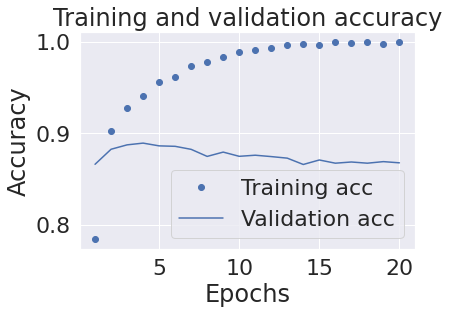

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.7053 - binary_accuracy: 0.6591 - val_loss: 0.3049 - val_binary_accuracy: 0.8829
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2725 - binary_accuracy: 0.8953 - val_loss: 0.3490 - val_binary_accuracy: 0.8463
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2039 - binary_accuracy: 0.9126 - val_loss: 0.3475 - val_binary_accuracy: 0.8565
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1346 - binary_accuracy: 0.9451 - val_loss: 0.3275 - val_binary_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1016 - binary_accuracy: 0.9617 - val_loss: 0.6349 - val_binary_accuracy: 0.7795
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0847 - binary_accuracy: 0.9671 - val_loss: 0.4615 - val_binary_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

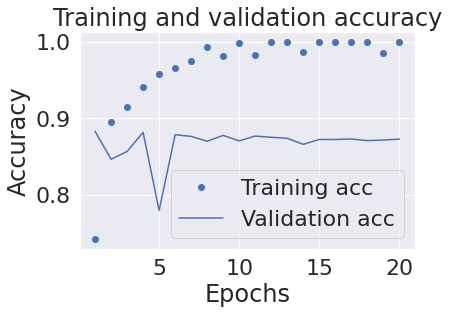

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()

acc = history1.history['binary_accuracy']
val_acc = history1.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 2.3831 - binary_accuracy: 0.5842 - val_loss: 0.5800 - val_binary_accuracy: 0.6960
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4731 - binary_accuracy: 0.8224 - val_loss: 0.3279 - val_binary_accuracy: 0.8754
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2584 - binary_accuracy: 0.9037 - val_loss: 0.3506 - val_binary_accuracy: 0.8416
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1802 - binary_accuracy: 0.9312 - val_loss: 0.4314 - val_binary_accuracy: 0.8200
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1497 - binary_accuracy: 0.9345 - val_loss: 0.4424 - val_binary_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1354 - binary_accuracy: 0.9467 - val_loss: 0.6492 - val_binary_accuracy: 0.8262
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

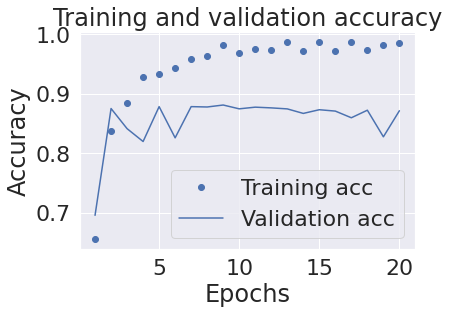

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=optimizers.RMSprop(lr=0.05),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()

acc = history2.history['binary_accuracy']
val_acc = history2.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
30/30 [==============================] - 3s 92ms/step - loss: 0.6868 - binary_accuracy: 0.5730 - val_loss: 0.6724 - val_binary_accuracy: 0.6862
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6647 - binary_accuracy: 0.7296 - val_loss: 0.6507 - val_binary_accuracy: 0.7636
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6400 - binary_accuracy: 0.7936 - val_loss: 0.6288 - val_binary_accuracy: 0.7956
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6153 - binary_accuracy: 0.8332 - val_loss: 0.6071 - val_binary_accuracy: 0.8121
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5908 - binary_accuracy: 0.8475 - val_loss: 0.5826 - val_binary_accuracy: 0.8267
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5627 - binary_accuracy: 0.8623 - val_loss: 0.5577 - val_binary_accuracy: 0.8369
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - los

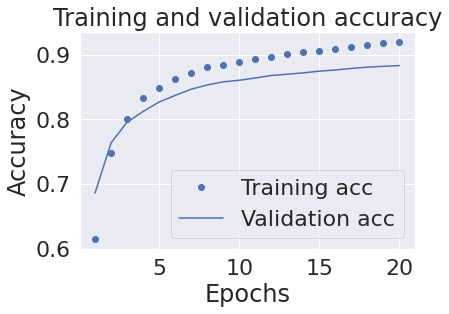

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()

acc = history3.history['binary_accuracy']
val_acc = history3.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<윤아>
다중분류문제에서 결과를 시각화하고 어느 클래스로 오분류가 많이 되었는지 파악해보세요.
✔ p124(새로운 데이터에 대해 예측하기)에 이어서 작성

✔ 사진과 https://eunguru.tistory.com/229 사이트를 참고해주세요.

✔ 사진: confusion_matrix 만드는 코드 & normalization한 시각화 결과

✔ 결과 사진에서 세로의 0 ~ 45가 실제 label, 가로의 0 ~ 45가 예측 label 입니다.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/9
16/16 [==============================] - 2s 66ms/step - loss: 3.1797 - accuracy: 0.4143 - val_loss: 1.8304 - val_accuracy: 0.6500
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.5871 - accuracy: 0.6953 - val_loss: 1.3464 - val_accuracy: 0.7040
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.1368 - accuracy: 0.7620 - val_loss: 1.1632 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8849 - accuracy: 0.8158 - val_loss: 1.0688 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 50ms/step - loss: 0.7075 - accuracy: 0.8554 - val_loss: 0.9947 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5449 - accuracy: 0.8875 - val_loss: 0.9769 - val_accuracy: 0.7850
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4675 - accuracy: 0.9068 - val_loss: 0.9118 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

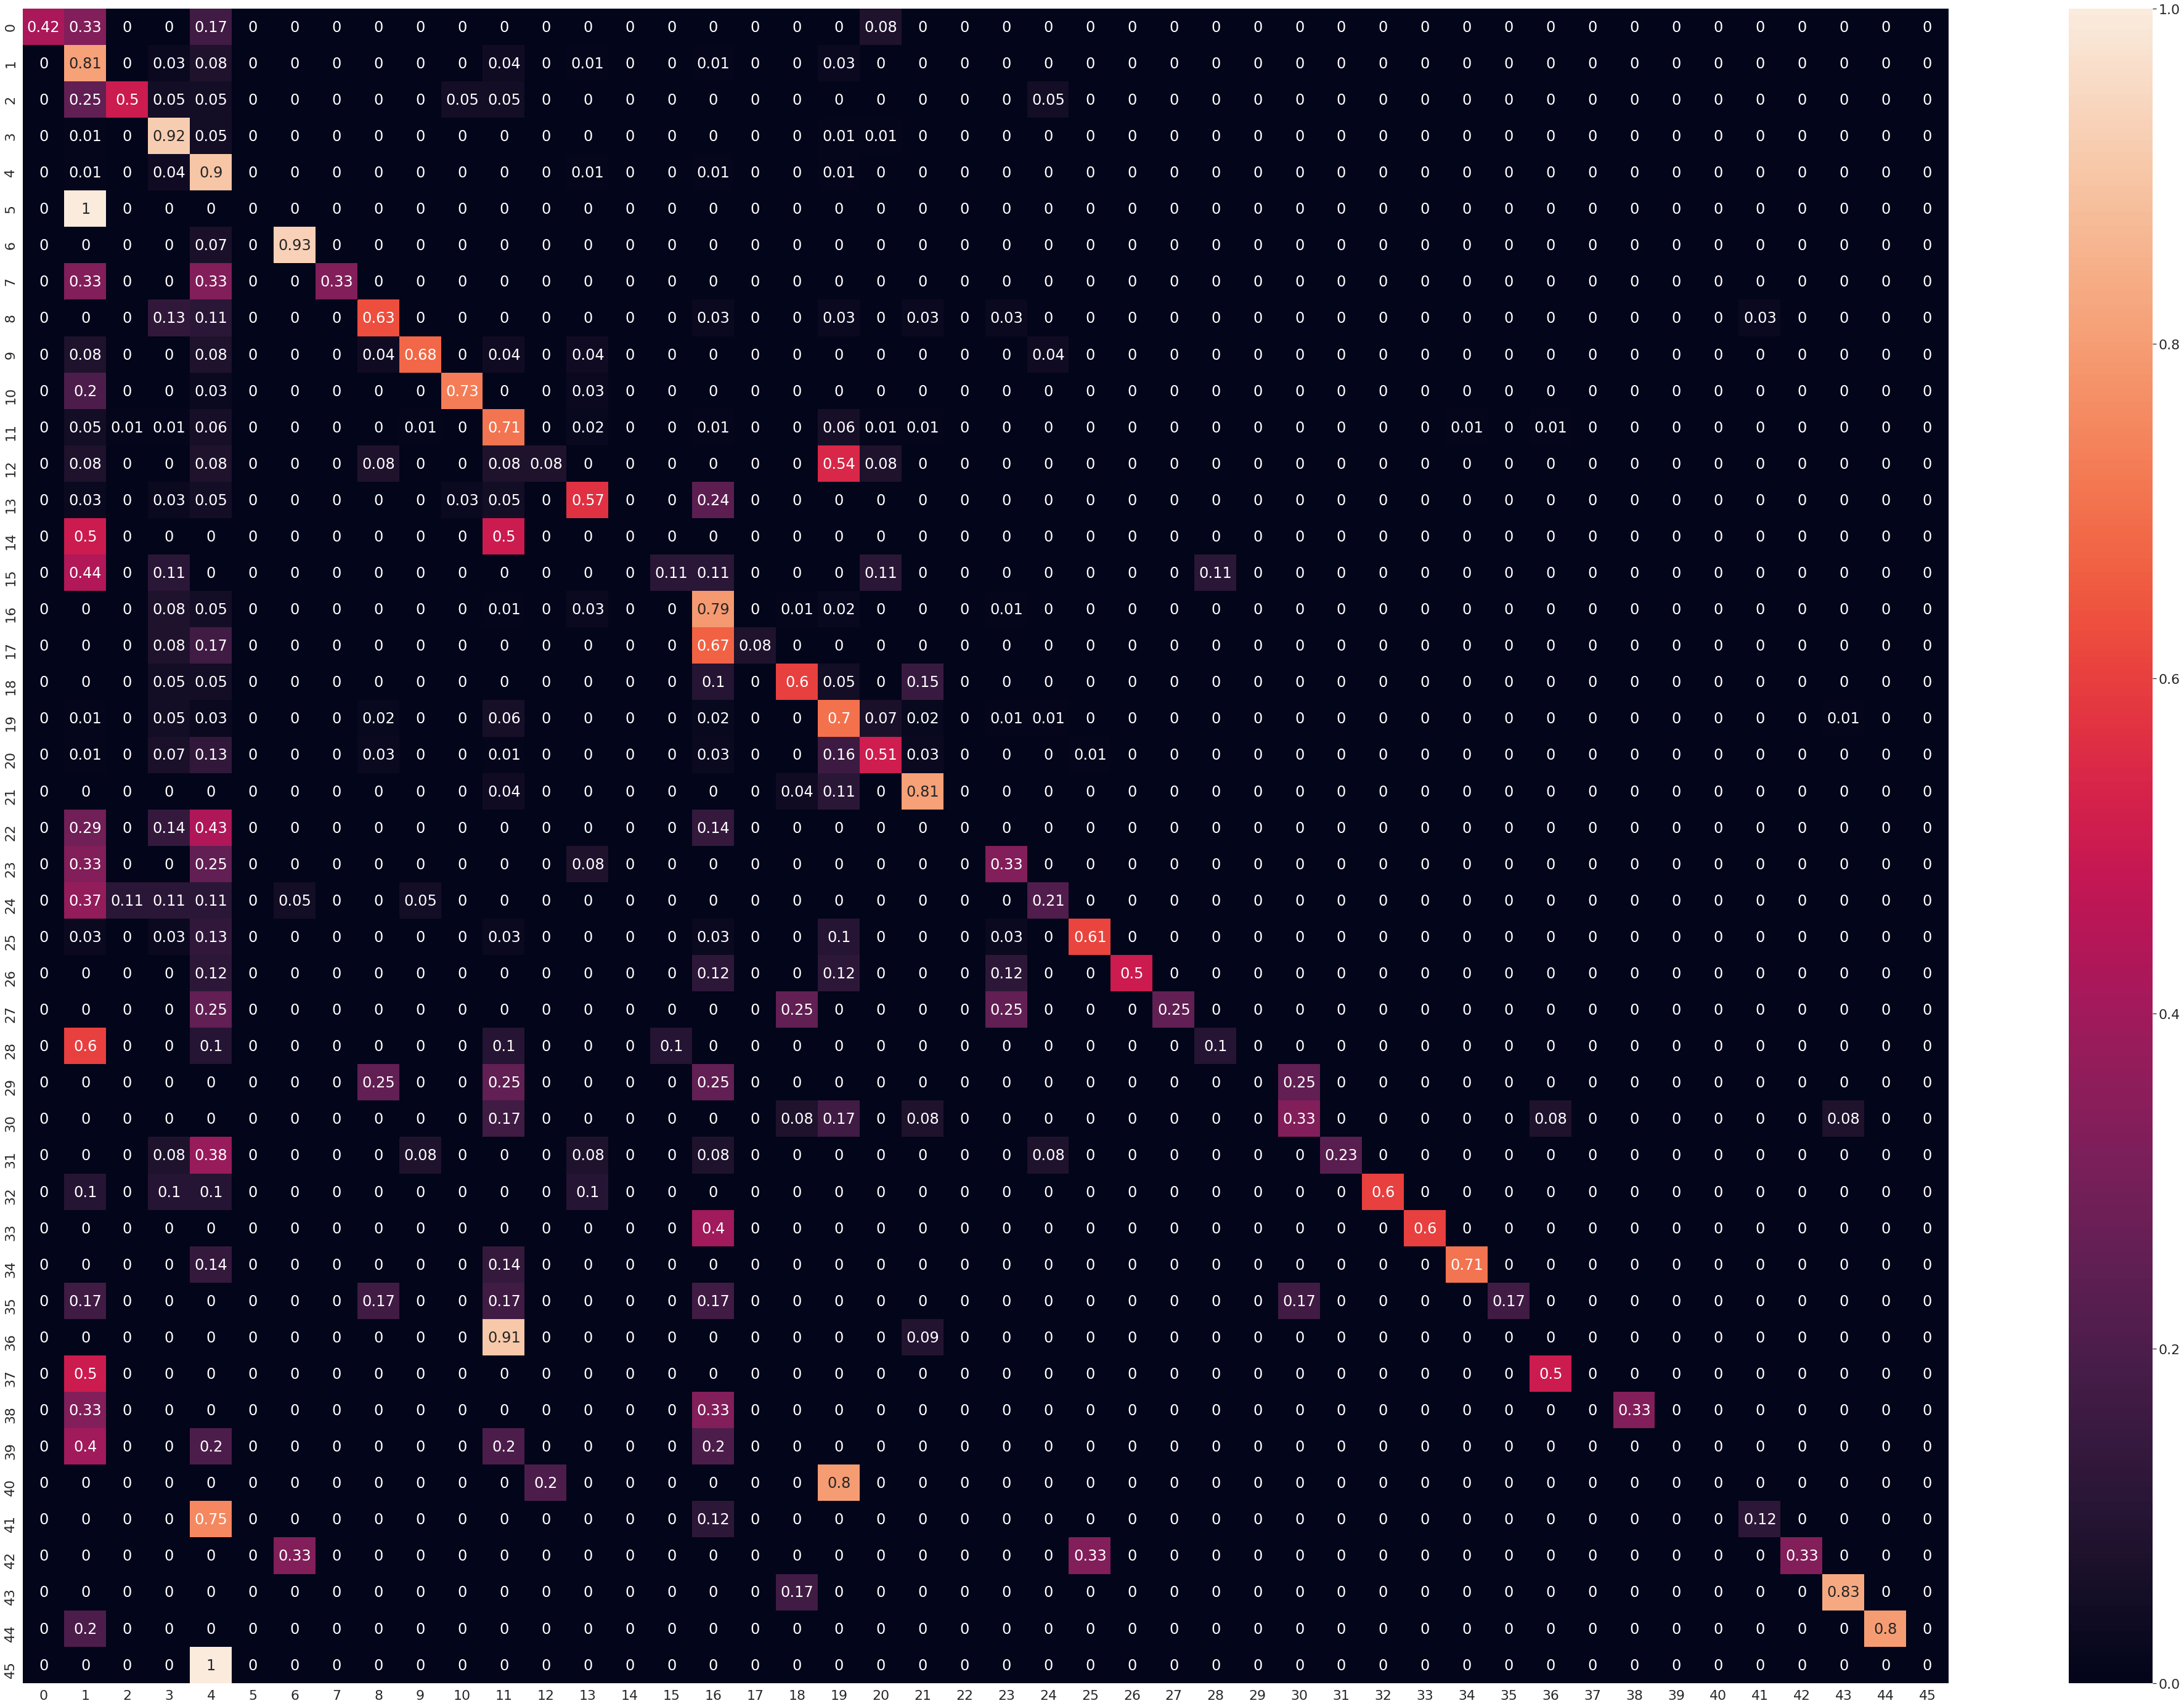

In [ ]:
%matplotlib inline
sns.set(font_scale=2)
predictions = model.predict(x_test)
test_pred = np.argmax(predictions, axis=1)
conf_mx = confusion_matrix(test_labels, test_pred)
total = np.sum(conf_mx, axis=1)
matrix = np.round(conf_mx/total[:,None], 2)
plt.figure(figsize=(70,50))
sns.heatmap(matrix, annot=True)